# 对泰坦尼克号数据的分析

## Question
>有哪些因素会让船上的人生还率更高？
* 生还率是否与男女比例相关
* 生还率与年龄分布的关系
* 生还率与船舱等级，或者资产的关联

In [13]:
# 导入titanic-data.csv
import pandas as pd
titanic_df = pd.read_csv('titanic-data.csv')
print(len(titanic_df))
titanic_df.head()

891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
# 划分生还者和死亡者的信息到两个df
survivor_df = titanic_df[titanic_df['Survived'] > 0]
dead_df = titanic_df[titanic_df['Survived'] == 0]
print(len(survivor_df))
print(len(dead_df))

342
549


## 生还率是否与男女比例相关?

In [18]:
# 分别计算生还者和死亡者的男女比例
male_survivor = survivor_df[survivor_df['Sex'] == 'male']
female_survivor = survivor_df[survivor_df['Sex'] == 'female']
male_dead = dead_df[dead_df['Sex'] == 'male']
female_dead = dead_df[dead_df['Sex'] == 'female']
print(len(male_survivor))
print(len(female_survivor))
print(len(male_dead))
print(len(female_dead))

109
233
468
81


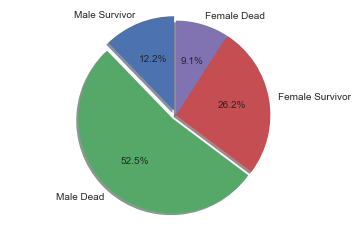

In [26]:
# 绘制直方图
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

labels = 'Male Survivor', 'Male Dead', 'Female Survivor', 'Female Dead'
sizes = [len(male_survivor), len(male_dead), len(female_survivor), len(female_dead)]
explode = (0.05, 0.05, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

## 女性比男性更容易生还？
* 虽然表面上看，男性乘客的生还率12.2%相较女性乘客的生还率9.1%略高，但是与总体的男女比例相比，男性生还者仅占总体男性的1：4.3，而女性生还者与总体女性的比例为1：2.88。因此，在泰坦尼克沉船事件中更高比例的女性获救。
* 你也许会认为在沉船事件中，女性相较男性更容易生还，但是事实上，这仅仅是针对泰坦尼克号而言。由于缺少足够多的样本数据，我们无法知晓对于大多数的沉船事件，生还率与男女性别是否有一定的关联，因此也无法推测女性就一定比男性更容易生还。

## 生还者与死亡者的年龄分布

In [33]:
# 去除数据中年龄为空的记录
survivor_age_valid = survivor_df[survivor_df['Age'].notnull()]
dead_age_valid = dead_df[dead_df['Age'].notnull()]
print(len(survivor_age_valid))
print(len(dead_age_valid))

290
424


(array([  26.,   59.,  129.,   93.,   57.,   33.,   17.,   10.]),
 array([  1.   ,  10.125,  19.25 ,  28.375,  37.5  ,  46.625,  55.75 ,
         64.875,  74.   ]),
 <a list of 8 Patch objects>)

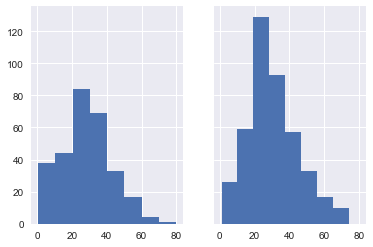

In [47]:
# 绘制生还者与死亡者的年龄分布直方图
n_bins = 8

x_survived = survivor_age_valid['Age']

x_dead = dead_age_valid['Age']

fig, axs = plt.subplots(1, 2, sharex=True, sharey=True)
axs[0].hist(x_survived, bins=n_bins)
axs[1].hist(x_dead, bins=n_bins)

## 儿童优先？
* 从生还者与死亡者的年龄分布直方图可以看到，10岁以下的生还者在人数上高于其所在年龄段的死亡者人数。而20岁至40岁年龄段的生还者人数则远远少于同年龄段的死亡者人数。
* 由此可以得出以下的推断：
> * 儿童的救援等级最高
> * 青壮年更愿意将生还的机会留给儿童，这也导致了这个年龄段的生还率偏低

## 船舱等级与平均资产正相关？

In [59]:
# 计算各个船舱等级的平均资产
fare_avg = titanic_df.groupby(['Pclass'], as_index=False).mean()
fare_avg

,Pclass,PassengerId,Survived,Age,SibSp,Parch,Fare
0,1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
1,2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
2,3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


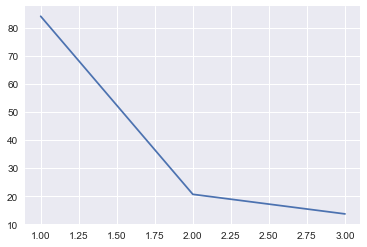

In [60]:
plt.plot(fare_avg['Pclass'], fare_avg['Fare'])

* 由折现图可以清楚的发现，一等舱乘客的平均资产 > 二等舱乘客的平均资产 > 三等舱乘客的平均资产
* 船舱等级与平均资产正相关

## 猜想：船舱等级越高，生还率越高

(array([  80.,   97.,  372.]),
 array([ 1.        ,  1.66666667,  2.33333333,  3.        ]),
 <a list of 3 Patch objects>)

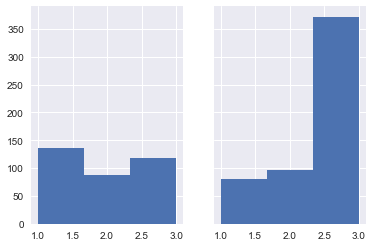

In [63]:
# 绘制生还者与死亡者所属船舱的直方图
n_bins = 3

x_survived = survivor_df['Pclass']

x_dead = dead_df['Pclass']

fig, axs = plt.subplots(1, 2, sharex=True, sharey=True)
axs[0].hist(x_survived, bins=n_bins)
axs[1].hist(x_dead, bins=n_bins)

## 验证猜想：
* 由上述直方图，可以清楚地发现，一等舱的生还者人数略多于其死亡者，二等舱生还者人数与死亡者人数基本持平，而三等舱死亡者人数则远远大于生还者。
* 三等舱所在的乘客为泰坦尼克号事件的主要死亡来源。

## 结论与预测
> 基于上述对泰坦尼克号事件的数据分析，得出以下推断：
* 妇孺生还率较高，更容易获救
* 船舱级别越高，生还率越高
* 持有资产越多的乘客更倾向于购买越高级别的船票，因而也更容易获救

> 因为样本数量过少，所以得出的以下预测仅仅是实验性的，还需得到更多的样本方可验证其准确性：
* 在大多数的沉船事件中，妇孺会被优先对待，更容易得到生还的机会
* 船舱级别越高，预示着在发生沉船时最先被安排逃生，生还率更高

## 分享我的研究成果
### 对于泰坦尼克号事件，我感兴趣的是哪些因素会使乘客更容易生还，即生还率与哪些因素相关。
* 我想搞清楚生还率是否与性别有关。于是我分别计算了男性生还者与死亡者人数，以及女性生还者与死亡者人数，并绘制了饼图，来直观地展现它们的比例。从而清晰地发现，在泰坦尼克号事件中，女性相较于男性的生还率更高。
* 我猜想年龄是造成生还率高低的一个重要因素。于是分别绘制了生还者和死亡者的年龄分布直方图，并对两张直方图做了对比，推断出儿童的生还率高，而青壮年的生还率较低。
* 我认为船舱等级很可能也是造成生还率不同的一个重要原因。同样我也通过分别绘制生还者和死亡者所属船舱的直方图来做对比，发现三等舱的乘客生还率非常低，远远低于一、二等舱的生还率。由此猜测，高级别船舱的乘客被安排逃生的优先级更高。
